# PC 2 : Interpolation polynomiale


**<big> Préparation avant la PC :</big>**

**Les questions 1 à 3 de l'exercice 1 et les questions 1 et 2 de l'exercice 2 sont à préparer** avant la séance de PC.

**<big><font color=black><span style="background-color:skyblue">À rendre</span></font> après la PC :</big>** 

**<big> Packages </big>**

In [1]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

**<big> Notations</big>**
>Dans toute cette PC, on considère
>- $f$ : $[a, b] \rightarrow \mathbb{R}$ une fonction continue,
>- $\|f\|_{\infty} = \max\limits_{x\in[a,b]} |f (x)|$,
>- $x_0$, ..., $x_n$ des points deux à deux distincts de $[a, b]$,
>- la base de Newton formée des polynômes $\Pi_{k}(X) = \prod\limits_{j=0}^{k-1} (X - x_j)$  (avec $\Pi_0 = 1$),
>- la base de Lagrange formée des polynômes $l_k(X)=\underset{j\neq k}{\prod\limits_{j=0}^{n}}\frac{X-x_j}{x_k-x_j}$,
>- $p_n(f) = \sum\limits_{k=0}^n f(x_k) l_k$ le polynôme d’interpolation de Lagrange de $f$ aux points $x_k$.

---

## Exercice 1 : Estimations d'erreur et phénomène de Runge

>On appelle <i>constante de Lebesgue</i>, et on note $\Lambda_n$, la norme de l'opérateur d'interpolation de Lagrange :
>
>$$
\mathcal{L}_n : \left\{
\begin{aligned}
\mathcal{C}^0\left([a,b]\right) &\to \mathcal{C}^0\left([a,b]\right) \\
f &\mapsto p_n(f).
\end{aligned}
\right.
$$
>
>Autrement dit, pour tout $f,g\in\mathcal{C}^0\left([a,b]\right)$, on a
>
>$$\left\Vert p_n(f) - p_n(g) \right\Vert_\infty \leq \Lambda_n \left\Vert f - g \right\Vert_\infty.$$
>
>On admettra que, 
>- si les points $x_i$ sont équidistant, $\Lambda_n\sim \frac{2^{n+1}}{en\ln n}$,
>- si les points $x_i$ sont les points de Tchebyshev, $\frac{2}{\pi}\ln (n+1)\le \Lambda_n \le  \frac{2}{\pi}\ln (n+1) + 1$
>
>Pour plus de détails, voir ([1,4]) et l'exercice 4.

---
**<big> I) Première estimation d'erreur</big>**

### Question 1 : 
Démontrer l'estimation (1.4) du cours : Pour une fonction $f\in C^{n+1}(\mathbb{R})$, alors

$$ \|f - p_n(f)\|_\infty \le \frac{\|\Pi_{n+1}\|_\infty}{(n+1)!} \| f^{(n+1)}\|_\infty.$$

*Indication :* 
- Dans un premier temps, en tout point $x\in[a,b]$, on pourra écrire $f(x) = p_{n+1,x}(f)(x)$ comme un polynôme d'interpolation de degrés $n+1$ pour faire apparaitre $\Pi_{n+1}$.   
- Dans un second temps, on exploitera la fonction $\phi_x(y) = f(y)-p_n(f)(y) - c(x) \Pi_{n+1}(y)$ pour une fonction $c$ appropriée.

$f(x) = p_{n+1, x}(f)(x)$

$f(x) - p_n(f)(x) = p_{n+1, x}(f)(x) - p_n(f)(x)$

$p_{n+1, x}(f)(x) - p_n(f)(x) = C_x \Pi_{n+1} \in \mathbb{P}_{n+1}[X]$

$\| f - p_n(f) \|_\infty \leq \|C_x\|_\infty \| \Pi_{n+1}\|_\infty$

$\Phi_x(x) = f(y) - p_n(f)(y) - C_c \Pi_{n+1}(y)$

$\Phi_x(x_i) = 0 = \Phi_x(x) \rightarrow$ n + 2 points d'annulation.

Rolle $\rightarrow n+1$ points différents tels que $\Phi'(y_i) = 0$

$n+1$ fois Rolle $\rightarrow \exists \xi \in [a, b], \, \Phi_x(\xi) = 0$

$\Phi_x^{(n+1)}(\xi) = f^{(n+1)}(\xi) - 0 - C_x(n+1)! = 0$

$\forall x \exists \xi_x$ tel que $C_x = \frac{f^{(n+1)}(\xi_x)}{(n+1)!}$



### Question 2 :
On admet ici la formule de Cauchy : Si $f$ est développable en série entière sur un ouvert contenant le disque fermé de centre $x$ et de rayon $r$ alors 

$$\frac{f^{(n)}(x)}{n!} = \frac{1}{2\pi} \int_0^{2\pi} \frac{f(x+re^{i\theta})e^{-i n\theta}}{r^{n}}d\theta. $$

Démontrer que si $f$ est développable en série entière en $\frac{a+b}{2}$ avec un rayon de convergence $R>3\frac{b-a}{2}$, alors $\|f-p_n(f)\|_\infty \underset{n\rightarrow +\infty}{\rightarrow} 0$.

$\frac{\| f^{(n+1)} \| _\infty}{(n+1)!} \leq \frac{2\pi}{2\pi}\frac{\| f \| _\infty}{r^{n+1}}$

$a - R \leq x + R \leq b + R$

$\|\Pi_{n+1}\| _ \infty \rightarrow \Pi_{n+1} (y) = \prod\limits_i (y-x_i)$

$\|\Pi_{n+1}\| _ \infty \leq (b-a)^{n+1}$

$\|f - p_n(f)\|_\infty \leq \|f\|_\infty \left( \frac{b-a}{r} \right)^{n+1} \xrightarrow[n\rightarrow \infty]{} 0$, avec $r > b - a$.


### Question 3 :
En déduire que l'erreur d'interpolation à points équidistant de la fonction sinus sur $[-\pi,\pi]$ tend vers zéro plus rapidement que $\rho^n$ pour tout $\rho \in ]0,1[$. 

>Dans toute la suite, on utilisera la fonction donnée dans la cellule suivante. Elle construit le polynôme d'interpolation dans la base de Lagrange 
>
>$$p_n(f) = \sum\limits_{k=1}^n y_k l_k$$
>
>où on doit fixer les $y_k = f(x_k)$ et les polynômes de Lagrange sont définis en en-tête.

In [2]:
def Lagrange(x_i, y_i, x):
    """
    calcule le polynome d'interpolation passant par les points (x_i,y_i) aux points x
    ----------
    parametres:
    x_i : points d'interpolation (np.array de taille N)
    y_i : valeurs atteintes aux points d'interpolation (np.array de taille N)
    x   : points où le polynome est évalués (np.array de taille Nx)
    
    valeur de retour:
    valeurs du polynome d'interpolation pn(f) aux points x (np.array de taille Nx)
    """
    N  = len(x_i)
    Nx = len(x)
    
    #Ici x_m_xi  est un tableau (N , Nx) contenant les x   - x_i pour tout i et tout x  
    #et  xi_m_xi est un tableau (N , N ) contenant les x_i - x_j pour tout i et j
    x_m_xi  = x[  :, np.newaxis] - x_i
    xi_m_xi = x_i - x_i[:, np.newaxis]

    li = np.zeros((Nx,N))
    for i in range(N):
        #Ici li est un  est un tableau (N , Nx) contenant les l_i(x) pour tout i et tout x  
        li[:,i] = np.prod(np.divide(x_m_xi[:,:i],xi_m_xi[np.newaxis,:i,i]),axis=1) * np.prod(np.divide(x_m_xi[:,i+1:],xi_m_xi[np.newaxis,i+1:,i]),axis=1) 
    
    return np.dot(li,y_i)

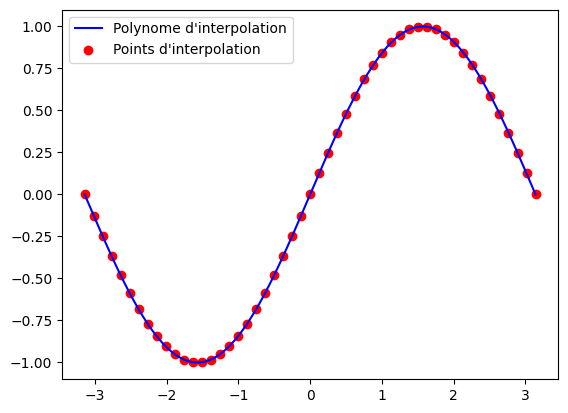

In [3]:
### Exemple d'utilisation de la fonction Lagrange avec la fonction sinus sur [-pi,pi]
N   = 50
Nx  = 2000 
xi  = np.linspace(-np.pi, np.pi, N +1) 
yi  = np.sin(xi)
x   = np.linspace(-np.pi, np.pi, Nx+1)

val = Lagrange(xi,yi,x)

plt.figure()
plt.plot(   x,  val, color="blue", label="Polynome d'interpolation")
plt.scatter(xi, yi , color="red" , label="Points d'interpolation")
plt.legend()
plt.show()

### Question 4 :  
**<font color=black><span style="background-color:skyblue">À rendre</span></font> :**
On va maintenant vérifier ce comportement numériquement. On approchera $\|f-p_n(f)\|_\infty$ par $\max_i |f(y_i)-p_n(f)(y_i)|$ où les $y_i$ sont 2000 points équirépartis sur $[-\pi,\pi]$. 


a) Tracer $\max_i |f(y_i)-p_n(f)(y_i)|$ en fonction de $n$ (pour des points d'interpolation équirépartis) pour $n$ allant de 2 jusqu'à 30 en utilisant les fonctions suivantes. 

b) Expliquer le comportement avant $n<20$ et proposer une interprétation à partir de $n \approx 20$.

c) Tracer sur le même graphe les erreurs $\max_i |f(y_i)-p_n(f)(y_i)|$ en fonction de $n$ pour la fonction sinus $x\mapsto sin(x)$ et pour la fonction $x\mapsto sin(2x)$ sur $[-\pi,\pi]$. À partir des estimations obtenues à la question 2, expliquer la différence de vitesses de convergence pour ces deux fonctions.

In [4]:
#a)
# Calculer l'erreur l_infini entre p_n(f) et f en fonction du nombre de points n d'interpolation
N       = 30
Nx      = 2000
x       = np.linspace(-np.pi, np.pi, Nx+1)

nb_pts       = np.arange(2,N+1) # tableau qui contient les différentes valeurs de n
err_inf_sin  = np.zeros(N-1)    # tableau qui contiendra les erreurs pour sin(x)
err_inf_sin2 = np.zeros(N-1)    # tableau qui contiendra les erreurs pour sin(2x) 

# Construire le tableau err_inf des erreurs l_infini err_inf
x   = np.linspace(-np.pi, np.pi, Nx+1)

def get_xi(n):
    return np.linspace(-np.pi, np.pi, n +1)

# f(x) = sin(x)
func = lambda x: np.sin(x)
err_inf_sin = np.fromiter((
    np.max(np.abs(Lagrange(get_xi(n), func(get_xi(n)), x) - func(x)))
    for n in range(2, N+1)
), np.double)
# f(x) = sin(2x)
func = lambda x: np.sin(2*x)
err_inf_sin2 = np.fromiter((
    np.max(np.abs(Lagrange(get_xi(n), func(get_xi(n)), x) - func(x)))
    for n in range(2, N+1)
), np.double)

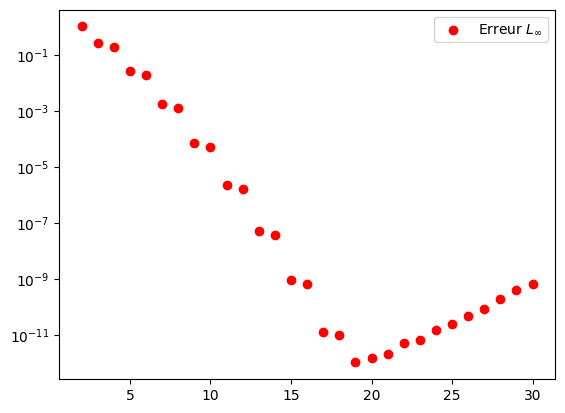

In [5]:
# Tracer l'erreur l_infini entre p_n(f) et f en fonction du nombre de points n d'interpolation


plt.figure()
plt.scatter(nb_pts,err_inf_sin ,color="red",label="Erreur $L_\\infty$")
plt.yscale("log")
plt.legend()
plt.show() 

**Réponse :**

b) Lorsque $n < 20$, l'erreur baisse, lorsqu'on augmente le degree du polynome. Ce qui est espère par le résultat de la Question 1. Pour $n > 20$, on trouve que le résultat est de pire en pire. Il n'est pas possible d'être un phénomène ed Runge, car la fonction sinus est assez régulière. Alors le problème arrive à cause du mal conditionnement de l'interpolation de Lagrange

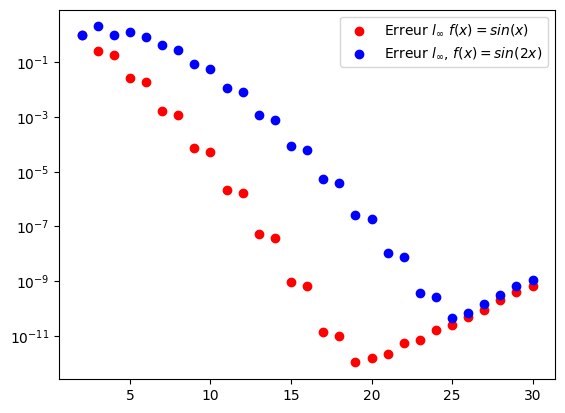

In [6]:
# Tracer l'erreur l_infini entre p_n(f) et f en fonction du nombre de points n d'interpolation
plt.figure()
plt.scatter(nb_pts,err_inf_sin, color="red", label="Erreur $l_\\infty$ $f(x) = sin(x)$")
plt.scatter(nb_pts,err_inf_sin2,color="blue",label="Erreur $l_\\infty$, $f(x)=sin(2x)$")
plt.yscale("log")
plt.legend()
plt.show() 

**Réponse :**

c) Les fonctions $sin(x)$ et $sin(2x)$ sont équivalents par le changement de variable $2y = x$. Alors, $r_{sin(x)} \approx 2r_{sin(2y)}$. Alors, selon la Question 2, l'erreur pour $sin(2y)$ décroissement moins vite, car $r$ est plus petit. Ce qui est d'accord au résultats numériques.

---
**<big> II) Estimation d'erreur plus fine via la constante de Lebesgue</big>**

### Question 5 :

Démontrer que

$$ \left\Vert f- p_n(f)\right\Vert_{\infty} \leq \left(1+\Lambda_n\right) \inf\limits_{Q\in\mathbb{R}_n[X]} \left\Vert f-Q\right\Vert_{\infty}. $$

$Q \in \mathbb{R}_n[X]$

$\| f - p_n(f) \|_\infty = \| f - Q + Q - p_n(f)\|_\infty \leq \|f - Q\|_\infty + \|p_n(Q) - p_n(f)\|_\infty \leq  (1 + \Lambda_n) \|f - Q \|_\infty$ , car $\|p_n(Q) - p_n(f)\|_\infty \leq \Lambda_n \|f - Q\|_\infty$

### Question 6 :

On admet que si $f$ est lipschitzienne alors

$$\inf\limits_{Q\in\mathbb{R}_n[X]} \left\Vert f-Q\right\Vert_{\infty} \leq \frac{C_f}{\sqrt{n}}.$$

Que peut-on en déduire concernant la convergence du polynôme d'interpolation $p_n(f)$ vers $f$, selon que les points d'interpolations $x_k$ sont équidistants ou les points de Tchebychev?


$$ \| f - p_n(f) \|_\infty \leq
\begin{cases}
\frac{C_f}{\sqrt{n}}\frac{2^{n+1}}{en ln(n)} \rightarrow \infty\;  \text{(Equidistant) pas de convergence}\\
\frac{C_f}{\sqrt{n}}\left (\frac{2}{\pi}ln(n+1) + 2\right) \rightarrow 0\; \text{(Tchebyschev) converge}
\end{cases}
$$

---
**<big> III) Phénomène de Runge </big>**

### Question 7 :

**<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
On considère la fonction 

$$f(x) = \frac{1}{1 + 25x^2}$$

sur l'intervalle $[-1,1]$. 

a) Pour les points de Tchebychef, on commencera par compléter la fonction *cheb_points* ci-dessous, et on testera qu'elle renvoie bien les bonnes valeurs pour l'intervalle $[-1,1]$ et de petites valeurs de n (n=2 et 3).

b) Tracer le polynôme d'interpolation $p_n(f)$ pour différentes valeurs de $n$ (n=10, 20, 50), ainsi que l'erreur entre $f$ et $p_n(f)$, en prenant des points d'interpolations équidistants, puis les points de Tchebychef.

c) À partir des estimations obtenues dans la partie II, expliquer la différence de vitesses de convergence entre ces deux choix de points. 

d) Tester à nouveau avec la fonctions $$\tilde{f}(x) = \frac{1}{1 + 0.1 x^2}.$$ Expliquer pourquoi on obtient à nouveau la convergence avec des points équirépartis. 

In [7]:
def f(x):
    """
    calcule la valeur de f(x)
    ----------   
    parametre:
    x : point ou on evalue f
    
    valeur de retour:
    valeur de f(x)
    """
    return 1/(1+25*x*x)
    
def f_tilde(x):
    """
    calcule la valeur de f_tilde(x)
    ----------   
    parametre:
    x : point ou on evalue f_tilde
    
    valeur de retour:
    valeur de f_tilde(x)
    """
    return 1/(1+0.1*x*x)

In [8]:
def cheb_points(xmin, xmax, n):
    """
    calcule la valeur des points de Tchebychev dans l'intervalle [xmin, xmax]
    ----------
    parametres:
    xmin : valeur minimale de l'intervalle
    xmax : valeur maximale de l'intervalle
    n : nb de points recquis sur l'intervalle
    
    valeur de retour:
    valeur des points de Tchebychev
    """
    return np.fromiter((0.5*(xmax + xmin + (xmax - xmin)*np.cos((2*k + 1)*np.pi/(2*n))) for k in range(n - 1, -1,-1)), np.double)

In [9]:
# Tester la fonction cheb_points sur les cas a 2 et 3 points
n=2
print(f"Les points de Tchebychev pour {n} noeuds :",cheb_points(-1,1,n))
n=3
print(f"Les points de Tchebychev pour {n} noeuds :",cheb_points(-1,1,n))

Les points de Tchebychev pour 2 noeuds : [-0.70710678  0.70710678]
Les points de Tchebychev pour 3 noeuds : [-8.66025404e-01  6.12323400e-17  8.66025404e-01]


In [10]:
# Tracer le polynome d'interpolation pour la fonction f
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
# n = 10
n = 20
# n = 50

# Construire les abscisses xk, les ordonnées yk et le polynome d'interpolation p 
# pour les différentes familles de points

# points equidistants
xk_equi = np.linspace(xmin, xmax, n + 1)
yk_equi = f(xk_equi)
p_equi  = Lagrange(xk_equi, yk_equi, x)


# points de Tchebychef
xk_cheb = cheb_points(xmin, xmax, n + 1)
yk_cheb = f(xk_cheb)
p_cheb  = Lagrange(xk_cheb, yk_cheb, x)


# Calculer le tableaux des erreurs entre p_n(f) et f aux points x
err_equi = np.abs(p_equi - func(x))
err_cheb = np.abs(p_cheb - func(x))

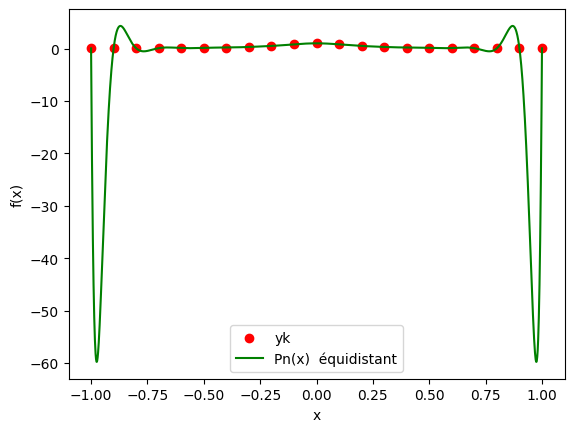

In [11]:
# Affichage avec le module matplotlib
fig_equi=plt.figure()
plt.scatter(xk_equi, yk_equi, color="red",   label="yk")
plt.plot(   x,       p_equi,  color="green", label="Pn(x)  équidistant")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

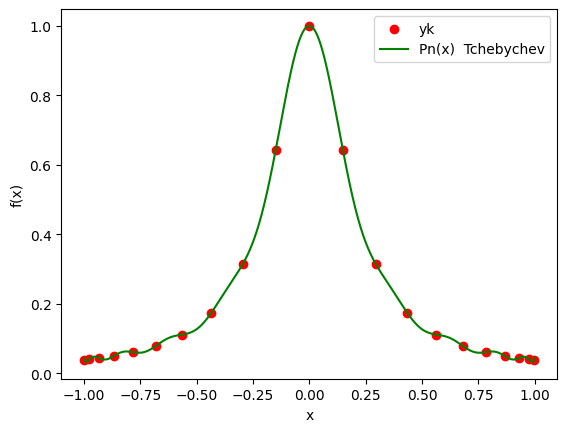

In [12]:
fig_cheb=plt.figure()
plt.scatter(xk_cheb, yk_cheb, color="red",   label="yk")
plt.plot(   x,       p_cheb,  color="green", label="Pn(x)  Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

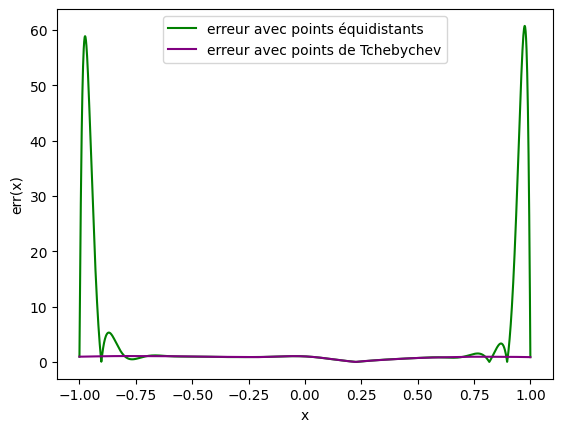

In [13]:
fig_err = plt.figure()
plt.plot(x, err_equi, color="green",  label="erreur avec points équidistants")
plt.plot(x, err_cheb, color="purple", label="erreur avec points de Tchebychev")
plt.xlabel("x")
plt.ylabel("err(x)")
plt.legend()
plt.show()

**Réponse :**

c) Ce différence est à cause de la différence entre les constants de Lebesgue.


$$ \Lambda_n \leq
\begin{cases}
\frac{2^{n+1}}{en ln(n)}  \;  \text{(Equidistant) pas de convergence}\\
\left (\frac{2}{\pi}ln(n+1) + 2\right) \; \text{(Tchebyschev) converge}
\end{cases}
$$



**Réponse :**

d) La fonction $\tilde{f}$ est plus régulière que la fonction de Ronge. C'est à dire ses derivés sont mieux comportées, car elles varient plus lentement. Alors, la fonction est assez bien comportée pour qu'il converge même avec les points équidistants.



In [104]:
# Tracer le polynome d'interpolation pour la fonction f
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 20

# Construire les abscisses xk, les ordonnées yk et le polynome d'interpolation p 
# pour les différentes familles de points

# points equidistants
xk_equi = np.linspace(xmin, xmax, n + 1)
yk_equi = f_tilde(xk_equi)
p_equi  = Lagrange(xk_equi, yk_equi, x)


# points de Tchebychef
xk_cheb = cheb_points(xmin, xmax, n + 1)
yk_cheb = f_tilde(xk_cheb)
p_cheb  = Lagrange(xk_cheb, yk_cheb, x)


# Calculer le tableaux des erreurs entre p_n(f) et f aux points x
err_equi = np.abs(p_equi - f_tilde(x))
err_cheb = np.abs(p_cheb - f_tilde(x))

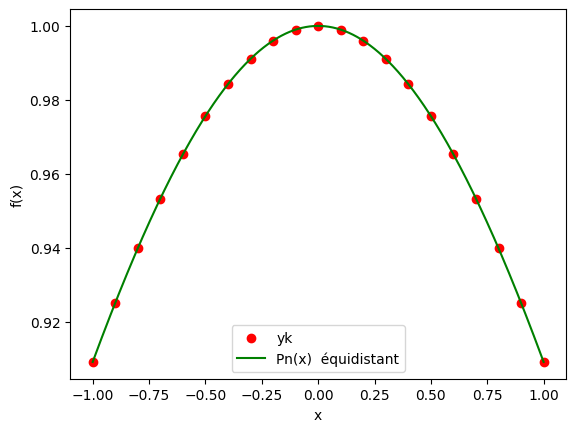

In [105]:
# Affichage avec le module matplotlib
fig_equi=plt.figure()
plt.scatter(xk_equi, yk_equi, color="red",   label="yk")
plt.plot(   x,       p_equi,  color="green", label="Pn(x)  équidistant")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

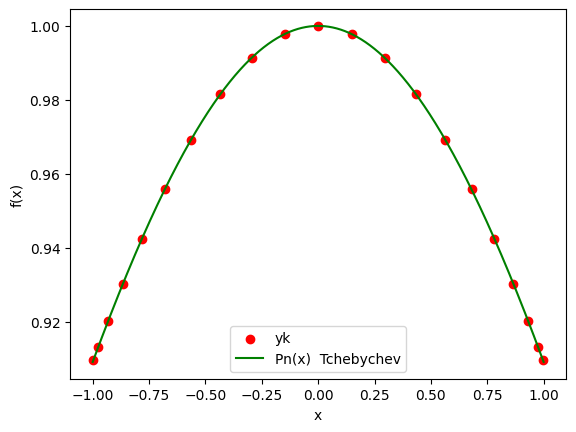

In [106]:
fig_cheb=plt.figure()
plt.scatter(xk_cheb, yk_cheb, color="red",   label="yk")
plt.plot(   x,       p_cheb,  color="green", label="Pn(x)  Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

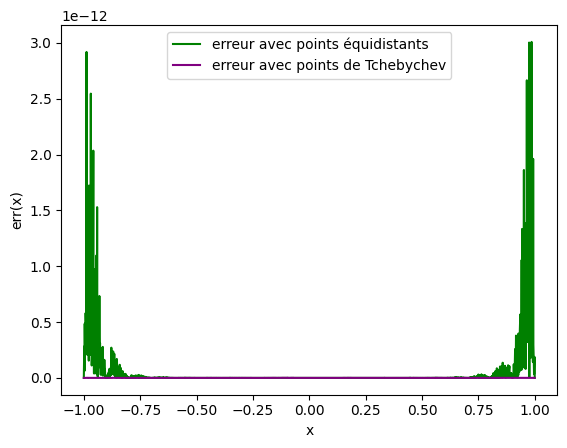

In [107]:
fig_err = plt.figure()
plt.plot(x, err_equi, color="green",  label="erreur avec points équidistants")
plt.plot(x, err_cheb, color="purple", label="erreur avec points de Tchebychev")
plt.xlabel("x")
plt.ylabel("err(x)")
plt.legend()
plt.show()

---

## Exercice 2 : Conditionnement et stabilité du polynome d'interpolation ([5,4])

>Pour toute fonction continue $f$, on définit le conditionnement du polynôme d'interpolation $p_n(f)$ par
>
>$$\kappa_n(f) = \frac{1}{\varepsilon} \sup_{\frac{\left\Vert \Delta f\right\Vert_{\infty}}{\left\Vert f\right\Vert_{\infty}}\leq \varepsilon} \frac{\left\Vert p_n(f+\Delta f) - p_n(f)\right\Vert_{\infty}}{\left\Vert p_n(f)\right\Vert_{\infty}}.$$

---
**<big> I) Conditionnement du polynome d'interpolation et stabilité de la formule de Lagrange </big>**

### Question 1 :

Montrer que le conditionnement du polynôme d'interpolation peut être majoré de la manière suivante 

$$\kappa_n(f) \leq \frac{\left\Vert f\right\Vert_{\infty}}{\left\Vert p_n(f)\right\Vert_{\infty}} \Lambda_n.$$

Que peut-on en déduire concernant le conditionnement du polynôme d'interpolation, en fonction du choix des points d'interpolation, dans le cas où $\left\Vert p_n(f)\right\Vert_{\infty}\approx \left\Vert f\right\Vert_{\infty}$?

$\kappa_n(f) = \frac{1}{\epsilon} \sup\limits_{\|\Delta f\| _\infty \leq \epsilon\|f\|_\infty} \frac{\|p_n(\Delta f)\|_\infty}{\|p_n(f)\|_\infty} \leq  \frac{1}{\epsilon} \sup\limits_{\|\Delta f\| _\infty \leq \epsilon\|f\|_\infty} \frac{\Lambda_n \|\Delta f\|_\infty}{\|p_n(f)\|_\infty} \leq \frac{\|f\|_\infty \Lambda_n}{\|p_n(f)\|_\infty} $

### Question 2 :

Donner une borne supérieur du conditionnement $\kappa_n$ du polynôme d'interpolation de la fonction de Runge avec les points de Tchebychev en fonction de $n$. On pourra notamment majorer ou minorer les normes infinies et remplacer $\Lambda_n$.  

$\|f\|_\infty = 1$

$$\|p_n(f)\|_n \geq \max \limits _i | f(x_i) | =
\begin{cases}
1\text{ si n impaire, } f(0) \\
f(\Delta x) \geq f\left ( \frac{1}{3}\right)
\end{cases}
$$

$\kappa \leq C \Lambda_n$

### Question 3 :

**<font color=black><span style="background-color:skyblue">À rendre :</span></font>**

1) Nous utilisons ici l'algorithme de l'exercice précédent sur la fonction sinus.
 
- Tester cet algorithme sur cette fonction avec 32 points d'interpolation (a) équidistribués et (b) de Tchebychev. 
- Ajouter une petite perturbation aléatoire aux ordonnées, c'est-à-dire fixer

$$(f+\Delta f)(x_i) = sin(x_i)+\epsilon_i$$

avec une perturbation $\epsilon_i$ aléatoire (on pourra utiliser la fonction rand ; https://numpy.org/doc/1.16/reference/generated/numpy.random.rand.html#numpy.random.rand) telle que $|\epsilon_i| < 2^{-10}$. 
- Tracer pour chaque famille de points les deux polynômes $p_n(f)$ et $p_n(f+\Delta f)$ sur le même graphe.
- Expliquer les différences et similarités entre ces courbes lorsqu'on utilise les points equidistribués et les points de Tchebychev. 

2) Calculer la distance relative 

$$\frac{\left\Vert p_n(f+\Delta f) - p_n(f)\right\Vert_{\infty}}{\left\Vert p_n(f)\right\Vert_{\infty}}$$

pour 32 points d'interpolation de Tchebychev (b). En déduire une estimation (numérique) par en dessous du conditionnement et comparer à l'estimation par au dessus de la question précédente. 

3) Sans perturbation $\epsilon_i = 0$, augmenter maintenant le nombre de points de Tchebychev (b) jusqu'à environ $n=660$. 
- Tracer à nouveau le polynôme d'interpolation dans ce cas.
- Calculer à nouveau l'estimation par au-dessus (de la question précédente) pour cette valeur de $n$. 
- Si le conditionnement est bas, d'où peuvent venir ces erreurs? Expliquer d'éventuels messages d'erreur ou de danger. 

In [18]:
#1)
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, 2000)
epsilon = 2.**(-10)

# degre du polynome 
n = 32

# Construire les abscisses xk, les ordonnées yk et les polynomes d'interpolation p associés 

func = np.sin

# points équidistribués (a)
xk_eq   = np.linspace(xmin, xmax, n + 1)
yk_eq   = func(xk_eq)
p_eq    = Lagrange(xk_eq, yk_eq, x)


# points de Tchebychef (b)
xk_cheb = cheb_points(xmin, xmax, n + 1)
yk_cheb = func(xk_cheb)
p_cheb  = Lagrange(xk_eq, yk_eq, x)


# perturbation

yk_eq_pert   = yk_eq +  np.random.uniform(-epsilon, epsilon, n + 1)
p_eq_pert    = Lagrange(xk_eq, yk_eq_pert, x) 

yk_cheb_pert = yk_cheb +  np.random.uniform(-epsilon, epsilon, n + 1)
p_cheb_pert  = Lagrange(xk_cheb, yk_cheb_pert, x) 

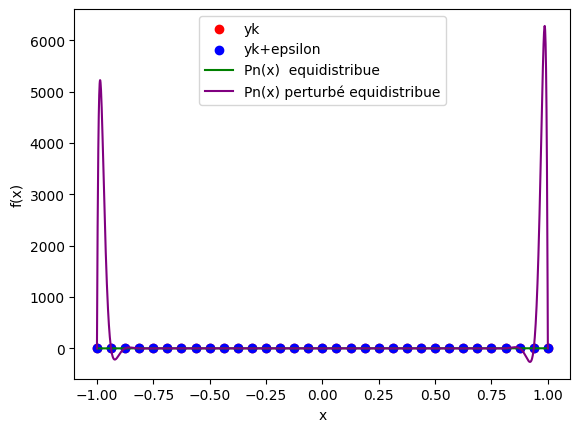

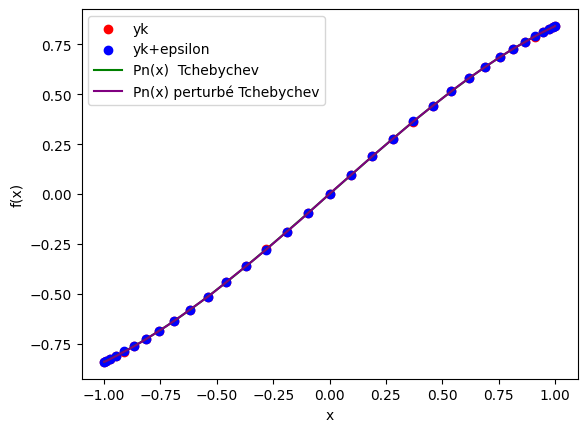

In [19]:
# Affichage avec le module matplotlib
fig_eq=plt.figure()
plt.scatter(xk_eq, yk_eq     , color="red",    label="yk")
plt.scatter(xk_eq, yk_eq_pert, color="blue",   label="yk+epsilon")
plt.plot(   x,     p_eq      , color="green",  label="Pn(x)  equidistribue")
plt.plot(   x,     p_eq_pert , color="purple", label="Pn(x) perturbé equidistribue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

fig_cheb=plt.figure()
plt.scatter(xk_cheb, yk_cheb     , color="red",    label="yk")
plt.scatter(xk_cheb, yk_cheb_pert, color="blue",   label="yk+epsilon")
plt.plot(   x,       p_cheb      , color="green",  label="Pn(x)  Tchebychev")
plt.plot(   x,       p_cheb_pert , color="purple", label="Pn(x) perturbé Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Réponse :** 

1. On voit que pour les points de Tchebychev, il n'y a pas de différence significative. Par contre, il y a des gross erreurs aux bouts du interval par les points équidistants. Ça ocorre, car l'interpolation avec les points équidistants n'est pas stable comme avec les points de Tchebychev.

In [20]:
#2)
# estimation par en dessous de kappa
estim_basse = np.max(np.abs(p_cheb_pert - p_cheb))/np.max(np.abs(p_cheb))/epsilon


# estimation par au dessus de kappa
lebesgue_constant = 2/np.pi*np.log(n + 1) + 1
estim_haute  = lebesgue_constant*np.max(np.abs(func(x)))/np.max(np.abs(p_cheb))


print(estim_basse, "<= kappa <= ", estim_haute) 

1.7531215289416253 <= kappa <=  3.2259458478623175


In [21]:
#3)
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 660

# Construire les abscisses xk, les ordonnées yk et le polynomes d'interpolation p associés 

func = np.sin

# points de Tchebychef
xk_cheb = cheb_points(xmin, xmax, n + 1)
yk_cheb =  func(xk_cheb)

# polynome 
p_cheb = Lagrange(xk_cheb, yk_cheb, x)

# estimation haute
rectified_p_cheb = p_cheb[np.isfinite(p_cheb)]
lebesgue_constant = 2/np.pi*np.log(n + 1) + 1
estim_haute  = np.max(np.abs(func(x)))/np.max(np.abs(rectified_p_cheb))/epsilon
print("kappa <= ", estim_haute)

c:\Users\ericg\Documents\X\1A - P1\AMP_41012\venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


kappa <=  2.195669528538036


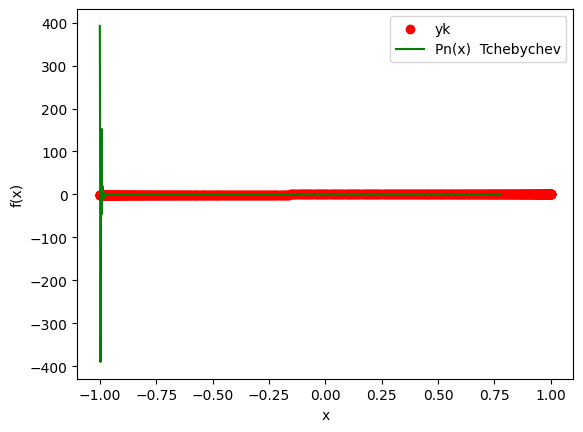

In [22]:
# Affichage avec le module matplotlib
fig_cheb=plt.figure()
plt.scatter(xk_cheb, yk_cheb, color="red",   label="yk")
plt.plot(   x,       p_cheb , color="green", label="Pn(x)  Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Réponse :** 

3. "RuntimeWarning: overflow encountered in reduce"
Alors les erreus vient du erreur numérique de overflow.



---
**<big>II) Polynôme d'interpolation de Tchebychev</big>**

> Les points de Tchebychev sont définis comme les zéros du polynôme $T_n$ de Tchebychev. Ces polynômes satisfont la propriété suivante 
>
> $$T_n(\cos\theta) = \cos(n\theta). \qquad{} (3)$$
>

### Question 4 :

On cherche à décomposer dans la base des polynômes de Tchebychev le polynôme d'interpolation passant par les points $(x_k,y_k)_{k=0,\dots,n}$ où les $x_k$ sont les points de Tchebychev  

$$ p_n(f) = \sum\limits_{k=0}^{n} c_k T_k.$$ 

Écrire le système linéaire satisfait par les coefficients $c_k$. 

$p_n(f)(x_i) = y_i = \sum\limits_{k = 0} ^n c_k T_k(x_i)$

$\overline{\overline{T}}\;\overline{C} = \overline{y}$

$\overline{\overline{T}}_{ik} = T_k(x_i)$

### Question 5 :

En utilisant la propriété (3), montrer que les coefficients $c_k$ du polynômes d'interpolation dans la base de Tchebychev sont donnés par 

$$ c_0 = \frac{1}{n+1}\sum_{i=0}^n T_0(x_i) y_i, \qquad{} c_j = \frac{2}{n+1}\sum_{i=0}^n T_j(x_i) y_i \quad{}\forall j= 1, \dots, n. $$

$\forall j$, $\sum\limits_{i=0}^n T_j(x_i) y_i = \sum\limits_{i=0}^n\sum\limits^n_{k = 0} c_k T_j(x_i)T_k(x_i) = \sum\limits_{k=0}^nc_k\sum\limits^n_{i = 0} (T_j - T_k)(x_i)$

$x_i = cos\theta_i$

$\sum\limits^n_{i=0} cos(j\theta_i)cos(k\theta_i) = \frac{1}{2} \sum\limits_{i=0}^n cos((j+k)\theta_i) + cos((j-k)\theta_i)$

$\theta_i \frac{2i+1}{2n+2}\pi$, i=0,...,n

$Re\left(\sum\limits_{l=0}^n z^{\left( l \frac{2\pi}{2n+2} + \frac{\pi}{2n+2}\right)(j \pm k)} \right) = Re\left(z^{\frac{\pi}{2n+2}(j\pm k)}\left(\frac{z^{(n+1)(j\pm k) - 1}}{z^{j \pm k} - 1}\right)\right)$

### Question 6 :

On donne ci-après une fonction *compute_Tchebychev_coef* qui calcule les coefficients $c_k$ du polynôme d'interpolation dans la base de Tchebychev, et une fonction *poly_interp_Tchebychev* qui évalue le  polynôme d'interpolation dans la base de Tchebychev à partir des $c_k$.

In [109]:
def compute_Tchebychev_coef(xmin, xmax, yk):
    """
    calcule le tableau des coefficients c_k^n dans la base de Tchebychev
    ----------  
    parametres :
    xmin, xmax : bornes de l'intervale de calcul
    yk         : tableau des f(xk) où les xk sont les points de Tchebychev
    
    valeur de retour :
    tableau des coefficients c_k^n
    """
    n        = len(yk)
    x        = cheb_points(xmin, xmax, n)
    theta    = np.arccos((x - (xmax+xmin)/2)*2/(xmax-xmin))
    A        = np.array([np.cos(i*theta) for i in range(n)])
    A[1:,:] *= 2
    A       /= n
    return np.matmul(A,yk)

In [110]:
def poly_interp_Tchebychev(coef, x):
    """
    calcule les valeurs en x du polynome dont les coefficients dans la base de Tchebychev sont coef 
    ---------- 
    parametres:
    coef : tableau des coefficients dans la base de Tchebychev
    x    : points où on evalue le polynome
    
    valeur de retour:
    tableau des valeurs du polynome en x
    """
    n     = len(coef)
    theta = np.arccos(x)
    T     = np.cos(np.outer(theta,np.arange(n)))  
    return np.matmul(T,coef)

a) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**  Tracer et comparer les courbes obtenues avec cet algorithme et avec celui donné pour la fonction de Runge de l'exercice précédent pour $n =10$. 

In [111]:
# Tracer les courbes
N    = 1000
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, N)

# degre du polynome 
n = 10


# Évaluer aux points x le polynome d'interpolation aux points de Tchebychev
# dans la base de Lagrange (p_cheb) et dans la base de Tchebychev (p_cheb_2)

# points equidistants
xk_cheb2 = cheb_points(xmin, xmax, n + 1)
yk_cheb2 = f(xk_cheb2)

# polynome 
p_cheb     = Lagrange(xk_cheb2, yk_cheb2, x)

coef_cheb2 = compute_Tchebychev_coef(xmin, xmax, yk_cheb2)
p_cheb2    = poly_interp_Tchebychev(coef_cheb2, x)

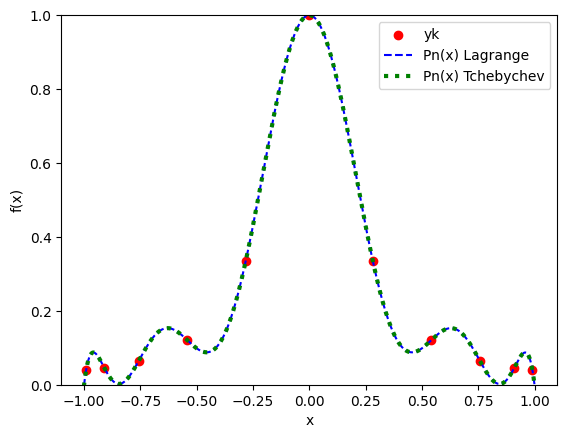

In [112]:
fig_equi=plt.figure()
plt.scatter(xk_cheb2, yk_cheb2,                    color="red",   label="yk")
plt.plot(   x       , p_cheb , linestyle='dashed', color="blue",  label="Pn(x) Lagrange")
plt.plot(   x       , p_cheb2, linestyle='dotted', linewidth=3, color="green", label="Pn(x) Tchebychev")
plt.ylim((0.,1.))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Réponse :**

Dans ce cas, les deux polynomes sont identiques, n'importe quelle base a été utilisé pour le construire.

e) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**  Pour cette fonction, augmenter le nombre de point au-delà $n=660$. Commenter la différence. 

In [27]:
# Tracer les courbes
N    = 1000
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, N)

# degre du polynome 
n = 660


# Évaluer aux points x le polynome d'interpolation aux points de Tchebychev
# dans la base de Lagrange (p_cheb) et dans la base de Tchebychev (p_cheb_2)

# points equidistants
xk_cheb2 = cheb_points(xmin, xmax, n + 1)
yk_cheb2 = f(xk_cheb2)

# polynome 
p_cheb     = Lagrange(xk_cheb2, yk_cheb2, x)

coef_cheb2 = compute_Tchebychev_coef(xmin, xmax, yk_cheb2)
p_cheb2    = poly_interp_Tchebychev(coef_cheb2, x)

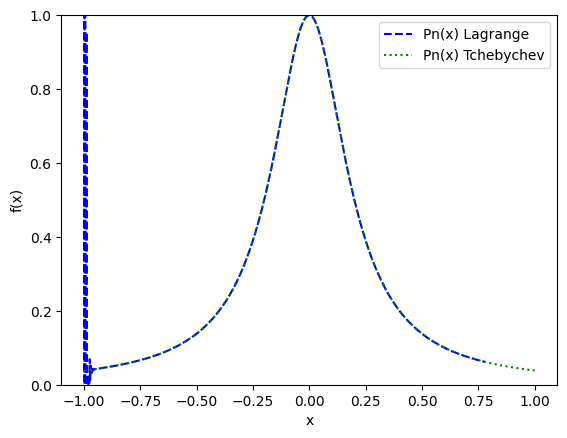

In [28]:
fig_equi=plt.figure()
#plt.scatter(xk_cheb2, yk_cheb2, color="red", label="yk")
plt.plot(x, p_cheb,  linestyle='dashed', color="blue", label="Pn(x) Lagrange")
plt.plot(x, p_cheb2, linestyle='dotted', color="green", label="Pn(x) Tchebychev")
plt.ylim((0.,1.))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Réponse :**

Dans ce cas, le polynome calculé avec la base de Lagrange a des problèmes au bord du intervalle à cause de la stabilité numérique du algorithme. Par contre, le polynome calculé avec la base de Tchebyschev n'a pas de problème, car l'algorithme est stable.

---
<Big>**Pour aller plus loin** :</Big> 

La suite du notebook comprend des questions et exercices optionelles. 
Elle inclue également des questions d'implémentation optionelles pour obtenir des points 
**<font color=black><span style="background:deepskyblue">bonus</span></font>**. 

---


**<big> III) Amélioration de la formule de Lagrange du polynôme d'interpolation </big>**

>L'algorithme construit au II) exploite les points de Tchebychev. Nous allons voir désormais des algorithmes qui cherchent à "corriger" les problèmes de stabilités algorithmiques dans la base de Lagrange.  
>
>On rappelle que le polynôme d'interpolation de Lagrange peut s'écrire de  la façon suivante dans la base de Lagrange
>
>$$p_n(f) = \sum_{k=0}^n f(x_k) l_k,$$
>
>où les polynômes $l_k$ sont définis au début de l'énoncé, et on introduit les poids $w_k$ définis par
>
>$$w_k = \frac{1}{\prod\limits_{l\neq k} (x_k - x_l)}, \qquad{} k=0,\ldots,n.$$

### Question 7 :

Montrer qu'on peut réécrire $p_n(f)$ de la façon suivante

$$
    p_n(f)(x) = 
    \left\{
    \begin{aligned}
        &\Pi_{n+1}(x)\sum_{k=0}^n \frac{\omega_k}{x-x_k} f(x_k) \qquad{} && x\notin \{x_0,\ldots,x_n\} \\
        &f(x_k) && x=x_k.
    \end{aligned}
    \right.    
$$

### Question 8 : 

**<font color=black><span style="background:deepskyblue">Bonus :</span></font>**
Implémenter une fonction qui calcule les poids $\omega_k$ en fonctions des points d'interpolations $x_k$, puis une fonction qui permet d'évaluer le polynôme d'interpolation en utilisant la formule ci-dessus.

In [48]:
def compute_bary_coef(xk):
    """
    calcule des poids wk en fonction des points d'interpolation xk 
    ----------
    parametres:
    xk : tableau des points d'interpolations 
    
    valeur de retour:
    valeur des poids wk
    """
    def all_but_k(k):
        bool_array = np.ones_like(xk, dtype=bool)
        bool_array[k] = False
        return bool_array
    return np.fromiter((1/np.prod(x_k - xk, where=all_but_k(k)) for k, x_k in enumerate(xk)), np.double)

In [63]:
def poly_interp_bary(xk, yk, wk, x):
    """
    calcule les valeurs en x du polynome par la formule de Lagrange améliorée 
    ---------- 
    parametres:
    xk   : tableau des abscisses des points d'interpolation  
    yk   : tableau des ordonnées des points d'interpolation  
    wk   : poids de a formule de Lagrange améliorée 
    x    : points où on evalue le polynome
    
    valeur de retour:
    tableau des valeurs du polynome en x
    """
    dict_f = {x_k : y_k for x_k, y_k in zip(xk, yk)}
    coefs = np.fromiter((np.prod(x_ - xk) for x_ in x), np.double)
    return np.fromiter((dict_f[x_] if x_ in dict_f else coef*np.sum(wk/(x_ - xk)*yk) for x_, coef in zip(x, coefs)), np.double)

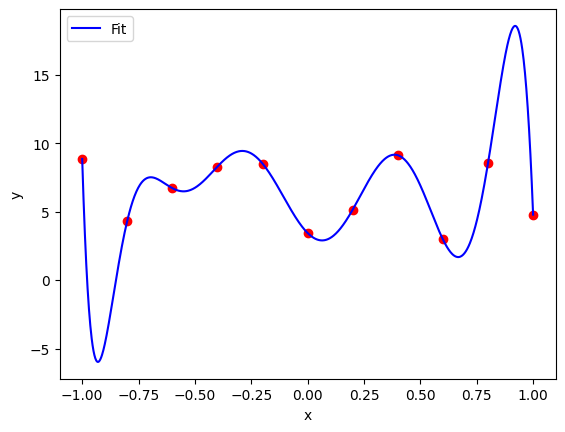

In [64]:
# Abscisses et ordonnees des points d'interpolation
xk = np.linspace(-1, 1, 11)
yk = np.array([8.85138827, 4.34206671, 6.71658158, 8.30040117, 8.5106317, 3.43844384,\
               5.15488902, 9.12458249, 2.97061689, 8.54675873, 4.78406823])

# Points auxquels p sera évalués pour le tracé
x  = np.linspace(-1, 1, 1000)

wk = compute_bary_coef(xk)
poly_fit = poly_interp_bary(xk, yk, wk, x)

plt.scatter(xk, yk, color='r')
plt.plot(   x       , poly_fit , linestyle='-', color="blue",  label="Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Question 9 :

**<font color=black><span style="background:deepskyblue">Bonus :</span></font>**
Essayer à nouveau d'approcher la fonction $g$ définie en (3), en utilisant ce nouvel algorithme pour calculer le polynôme d'interpolation. 

*Indication :* On pourra augmenter progressivement le nombre de points d'interpolation $n$ jusqu'à environ 820.

Qu'observez vous pour les coefficients $\omega_k$ lorsque $n$ se rapproche de cette valeur?

In [65]:
def g(x):
    return np.tanh(20*np.sin(15*x)) + 0.02*np.exp(3*x)*np.sin(300*x)


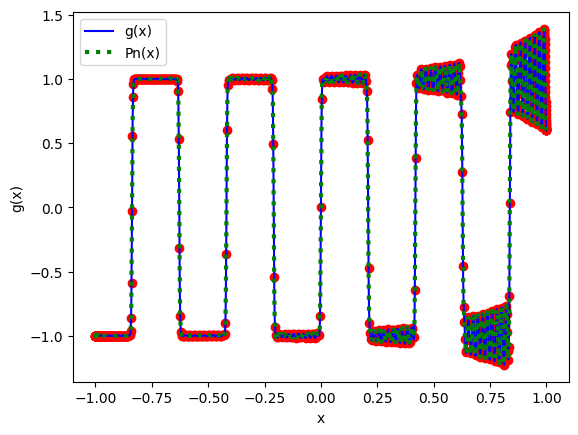

In [92]:
# Points auxquels g et P_n(g) seront évalués pour le tracé
xmin = -1
xmax = 1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 796

x_k = cheb_points(xmin, xmax, n + 1)
y_k = g(x_k)

wk = compute_bary_coef(x_k)
poly_interp_bary_fit = poly_interp_bary(x_k, y_k, wk, x)


fig_equi=plt.figure()
plt.scatter(x_k, y_k, color='r')
plt.plot(   x       , g(x) , linestyle='-', color="blue",  label="g(x)")
plt.plot(   x       , poly_interp_bary_fit, linestyle='dotted', color="green", label="Pn(x)", linewidth=3)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.show()


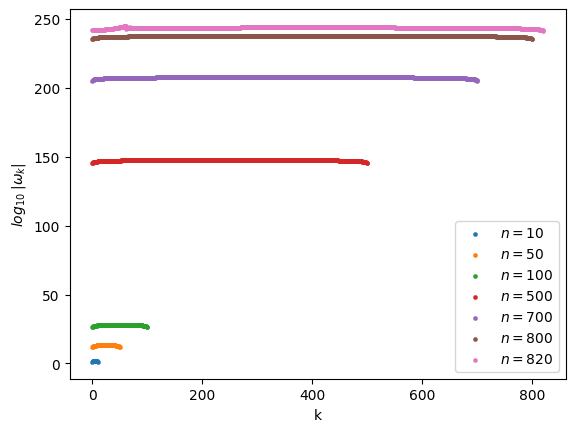

In [103]:
# Points auxquels g et P_n(g) seront évalués pour le tracé
xmin = -1
xmax = 1

# degre du polynome 
ns = [10, 50, 100, 500, 700, 800, 820]
for n in ns:
    x_k = cheb_points(xmin, xmax, n + 1)
    wk = compute_bary_coef(x_k)
    k = np.arange(0, n + 1)
    plt.scatter(k, np.log10(np.abs(wk)), marker='.', linewidths=0.3, label=f"$n={n}$")
plt.xlabel("k")
plt.ylabel("$log_{10}\\;|\\omega_k|$")
plt.legend()
plt.show()


**Réponse :**

Les valeurs $\omega_k$ croissent en module exponentiellement avec $n$.

---
**<big> IV) Formule barycentrique du polynôme d'interpolation </big>**

### Question 10 :

Montrer que 

$$\Pi_{n+1}(x) \sum_{k=0}^n \frac{\omega_k}{x-x_k} = 1,$$

et en déduire qu'on peut réécrire $p_n(f)$ de la façon suivante

$$
    p_n(f)(x) = 
    \left\{
    \begin{aligned}
        & \frac{\displaystyle \sum_{k=0}^n \frac{\omega_k}{x-x_k} f(x_k)}{\displaystyle \sum_{k=0}^n \frac{\omega_k}{x-x_k}} \qquad{} && x\notin \{x_0,\ldots,x_n\} \\
        &f(x_k) & &x=x_k.
    \end{aligned}
    \right.    
$$

>On admet que pour tout $n\in\mathbb{N}$, en prenant les points d'interpolation de Tchebychef on a
>
>$$\omega_k = C_n \tilde\omega_k \qquad{} \forall~k\in\{0,\ldots,n\},$$
>
>où
>
>$$\tilde\omega_k = (-1)^k \sin\left(\frac{(2k+1)\pi}{2n+2}\right),$$
>
>et donc qu'on peut réécrire $P_n(f)$ comme
>
>$$
    p_n(f)(x) = 
    \left\{
    \begin{aligned}
        & \frac{\displaystyle \sum_{k=0}^n \frac{\tilde\omega_k}{x-x_k} f(x_k)}{\displaystyle \sum_{k=0}^n \frac{\tilde\omega_k}{x-x_k}} \qquad{} && x\notin \{x_0,\ldots,x_n\} \\
        &f(x_k) && x=x_k.
    \end{aligned}
    \right.    
$$

### Question 11 :

**<font color=black><span style="background:deepskyblue">Bonus :</span></font>**
Essayer à nouveau d'approcher la fonction de Runge $f$, en utilisant le nouvel algorithme modifié pour calculer le polynôme d'interpolation. 

*Indication :* On pourra augmenter progressivement le nombre de points d'interpolation $n$ jusqu'à environ 5000.

In [34]:
def poly_interp_bary_modif(xk, yk, wk, x):
    """
    calcule les valeurs en x du polynome par la formule barycentrique n
    ---------- 
    parametres:
    xk   : tableau des abscisses des points d'interpolation  
    yk   : tableau des ordonnées des points d'interpolation  
    wk   : poids de a formule de Lagrange améliorée 
    x    : points où on evalue le polynome
    
    valeur de retour:
    tableau des valeurs du polynome en x
    """
    n = xk.size - 1
    dict_f = {x_k : y_k for x_k, y_k in zip(xk, yk)}
    wk_tilde = np.fromiter(((-1)**k*np.sin((2*k + 1)*np.pi/(2*(n + 1))) for k in range(n + 1)), np.double)
    return np.fromiter((dict_f[x_] if x_ in dict_f else np.sum(wk_tilde/(x_ - xk)*yk)/np.sum(wk_tilde/(x_ - xk)) for x_ in x), np.double)

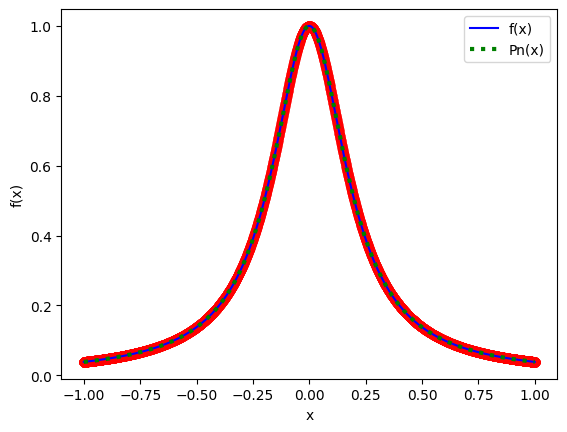

In [35]:
# Points auxquels g et P_n(g) seront évalués pour le tracé
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 5000

x_k = cheb_points(xmin, xmax, n + 1)
y_k = f(x_k)

poly_interp_bary_fit = poly_interp_bary_modif(x_k, y_k, None, x)


fig_equi=plt.figure()
plt.scatter(x_k, y_k, color='r')
plt.plot(   x       , f(x) , linestyle='-', color="blue",  label="f(x)")
plt.plot(   x       , poly_interp_bary_fit, linestyle='dotted', color="green", label="Pn(x)", linewidth=3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

---
**<big> V) Test numérique  </big>**

>On considère maintenant la fonction $g:[-1,1]\to\mathbb{R}$ définie par
>
>$$g(x) = \tanh(20 \sin(15 x)) + 0.02\exp(3x)\sin(300x), \qquad{} (3)$$
>
>qu'on va essayer d'approcher à l'aide du polynôme d'interpolation de Lagrange $P_n(g)$ **aux points de Tchebychef**.

### Question 12 :

a) Tracer $g$ sur $[-1,1]$.

In [36]:
def g(x):
    return np.tanh(20*np.sin(15*x)) + 0.02*np.exp(3*x)*np.sin(300*x)


In [37]:
# Points auxquels g sera évaluée pour le tracé
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)


b) A l'aide des différents algorithmes développés, essayer d'approcher $g$ à l'aide de son polynôme d'interpolation aux points de Tchebychef de degrés le plus élevé possible. 

In [38]:
# Points auxquels g et P_n(g) seront évalués pour le tracé
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 10



---

## Exercice 3 : Approximation par les polynômes de Bernstein

>Dans cet exercice, on considère $[a,b]=[0,1]$. 
>
>Les polynômes de Bernstein sont définis par $B_k^n(x) = {n \choose k} x^k(1-x)^{n-k}$, où ${n \choose k}$ sont les coefficients binomiaux. À l'aide de ces polynômes on peut définir le polynôme 
>
>$$ R_n(f) = \sum_{k=0}^n f\left(\frac{k}{n}\right) B_k^n,$$
>
>qu'on appelle la $n$-ième approximation de $f$. Notons que les polynômes $R_n(f)$ sont construits à partir des valeurs de $f$ aux points $0,\frac{1}{n},...,1$, mais en ces points la valeur de $R_n(f)$ peut être différente de celle de $f$ : l'approximation obtenue n'est pas une interpolation. On peut montrer que, pour toute fonction $f$ continue sur $[a,b]$, les polynômes $R_n(f)$ convergent uniformément vers $f$ quand $n\to \infty$. Le but de cet exercice est de démontrer ce résultat et d'obtenir une estimation de la vitesse de convergence, quand la fonction $f$ est lipschitzienne.

### Question 1

Montrer que les polynômes de Bernstein vérifient les identités suivantes pour tout $x \in [0,1]$:

$$\sum_{j=0}^n B_j^n(x) = 1,\quad{}  \sum_{j=0}^n \frac{j}{n} B_j^n(x) = x, \quad{} \sum_{j=0}^n \frac{j^2}{n^2} B_j^n(x)= \left(1-\frac{1}{n}\right) x^2+\frac{1}{n} x.$$

### Question 2 

Soit $\delta >0,\ x \in [0,1]$ et $k \in \{0,1,...,n\}$. Montrer que si $f$ est $L$-lipschitzienne alors on a les estimations suivantes :

$$
\begin{aligned}
    \text{a)} \quad{} & \left| \sum_{k=0, |x-k/n|\leq \delta}^n (f(x)-f(k/n))B_k^n(x)\right| \leq L\delta \\ \\
	\text{b)} \quad{} & \left| \sum_{k=0, |x-k/n|\geq \delta}^n (f(x)-f(k/n))B_k^n(x)\right| \leq L\delta\left( 1+ \frac{1}{\delta^2}\left(x-\frac{k}{n}\right)^2 \right).
\end{aligned}
$$

### Question 3 

En déduire que si $f$ est $L$-lipschitzienne, alors 

$$ \|f-R_n(f)\|_\infty \leq \frac{9L}{4n^{1/2}}.$$

---

## Exercice 4 : Estimations des constantes de Lebesgue ([1])

### Question 1 : Une formule pour la constante de Lebesgue

Montrer que

$$\Lambda_n = \sup\limits_{x\in[a,b]} \sum_{k=0}^n \left\vert l_k(x)\right\vert,$$

où les $l_k$ sont les polynômes de Lagrange.

### Question 2 : Un encadrement pour les points équidistants

>On suppose dans cette question que les points $x_k$ sont équidistants : 
$x_k=a+k\frac{b-a}{n}$. 
>
>*Sans perte de généralité, on considèrera dans toute cette question $[a,b]=[0,n]$.*

a) En considérant $x=\frac{1}{2}$, montrer que

$$\left\vert l_k(x) \right\vert \geq \frac{1}{4n^2}\binom{n}{k}.$$

b) En considérant $x\in [i,i+1]$ pour un certain $i\in\{0,\ldots,n-1\}$, montrer que

$$\left\vert l_k(x) \right\vert \leq \binom{n}{k}.$$

c) En déduire que 

$$\frac{2^n}{4n^2}\leq \Lambda_n \leq 2^n.$$

### Question 3 : Une majoration pour les points de Tchebyshev

>On considère dans cette question que les points $x_k$ sont les points de Tchebyshev. 
>
>*Sans perte de généralité, on considèrera dans toute cette question $[a,b]=[-1,1]$.*

a) Exprimer $l_k(x)$ en fonction de $\Pi_{n+1}(x)$ et de $\Pi_{n+1}'(x_k)$, puis en fonction de $T_{n+1}(x)$ et de $T_{n+1}'(x_k)$.

b) En utilisant le changement de variable $x=\cos \theta$, montrer que

$$\left\vert l_k(\cos\theta)\right\vert = \frac{\left\vert \sin(\theta_k)\cos((n+1)\theta)\right\vert}{(n+1)\left\vert \cos(\theta)-\cos(\theta_k)\right\vert}.$$

c) À l'aide notamment de formules de trigonométrie, en déduire que

$$\left\vert l_k(\cos\theta)\right\vert \leq \frac{\pi}{2} \frac{\vert \sin\theta_k\vert \vert \cos((n+1)\theta)\vert}{(n+1)\vert \sin \frac{\theta+\theta_k}{2} \vert \vert \theta - \theta_k\vert} \leq \pi\frac{\left\vert \cos((n+1)\theta)\right\vert}{(n+1)\left\vert \theta-\theta_k\right\vert}.$$

d) On fixe $\theta\in[0,\pi]$ et on note $\theta_j$ le point de Tchebychev le plus proche de $\theta$. Montrer que

$$
\left\vert l_k(\cos\theta)\right\vert \leq \left\{
\begin{aligned}
& \pi,\quad & \vert k-j\vert \leq 1,\\
&  \frac{1}{\vert k-j\vert -1},\quad &\text{sinon}.
\end{aligned}
\right.
$$

e) En déduire l'existence d'une constante $C$ telle que

$$\Lambda_n \leq C\ln n.$$

---

## Exercice 5 : Méthode des différences divisées

>On note $c^n_0,\ldots,c^n_k,\ldots,c^n_n$ les coefficients du polynôme d'interpolation de Lagrange $P_n(f)$ dans la base des *polynômes de Newton* :
>
>$$p_n(f)=\sum_{k=0}^n c^n_k \Pi_k.$$
>
>On va expliquer pourquoi cette base est intéressante, et obtenir un algorithme permettant de calculer ces coefficients uniquement à partir des valeurs d'interpolation $f(x_0),\ldots, f(x_n)$.

---
**<big> I) Calcul du polynôme d'interpolation de Lagrange dans la base de Newton </big>**

### Question 1
On note $f[x_0,\ldots,x_n]$ le coefficient de degré $n$ (dans la base canonique) du polynôme d'interpolation $p_n(f)$ aux points $x_0,\ldots,x_n$. Montrer que pour tout $n\in\mathbb{N}$

$$c_n^n=f[x_0,\ldots,x_n].$$

On rajoute un point d'interpolation $x_{n+1}$ (distinct des points $x_0,\ldots,x_n$). Démontrer l'identité suivante :

$$f[x_0,\ldots,x_{n+1}]=\frac{f[x_{1},\ldots,x_{n+1}]-f[x_0,\ldots,x_{n}]}{x_{n+1}-x_0}. \qquad{} (1)$$

*Indication : On pourra considérer le polynôme $\tilde{p}_{n}(f)$ d'interpolation de $f$ en $x_1,\ldots,x_{n+1}$, et étudier le polynôme*

$$\frac{(x-x_0)\tilde{p}_{n}(f) - (x-x_{n+1})p_n(f)}{x_{n+1}-x_0}.$$

### Question 2
Montrer qu'il existe $\alpha\in\mathbb{R}$ tel que

$$p_{n+1}(f)-p_n(f) = \alpha \Pi_{n+1}.$$

Que peut-on en déduire concernant les coefficient $c_k^n$ et $c_k^{n+1}$ pour $k\leq n$?

### Question 3 
En déduire que 

$$p_n(f)(x)=\sum_{k=0}^n f[x_0,\ldots,x_k] \Pi_k(x),\quad \forall~x\in[a,b]. \qquad{} (2)$$

---
**<big> II) Complexité </big>**
    
### Question 4 
Calculer le nombre d'opérations (additions, soustractions, multiplications ou divisions) nécessaires pour calculer les coefficients $c_0^n,\dots, c_k^n, \dots, c_n^n$ à $n$ fixé.

### Question 5
De même, connaissant les $c_0^n,\dots, c_k^n, \dots, c_n^n$, calculer le nombre d'opérations pour évaluer $p_n(f)(x)$ en un point $x$ donné. On utilisera pour cela la méthode de Horner ([3,2]) 

$$
\begin{aligned}
q_1(x) &= c_n^n (x-x_{n-1}) + c_{n-1}^n, \\ 
q_{i+1}(x) &= (x-x_{n-(i+1)}) q_i(x) + c_{n-(i+1)}^n,  \\
p_{n}(f) &= q_{n}.
\end{aligned}
$$

### Question 6 
Combien cela fait-il d'opérations au total pour évaluer $m$ valeurs de $p_n(x)$.

### Question 7 
Comparer avec le nombre d’opérations nécessaires si on avait fait les calculs dans la base de Lagrange. Commenter les avantages et les inconvénients des deux méthodes.

---
**<big> III) Mise en oeuvre </big>**

### Question 8 

On cherche ici uniquement à comparer la complexité algorithmique de deux implémentations. On étudiera par la suite la précision des résultats obtenus. 

La cellule suivante propose une implémentation du calcul des coefficients du polynome d'interpolation dans la base de Newton. 

a) Cette implémentation présente deux boucles. Implémenter une seconde fonction ayant les mêmes entrées et sorties mais qui ne présente qu'une seule boucle, la seconde boucle étant remplacée par un calcul vectoriel.

*Tester votre algorithme sur l'exemple simple suivant. Considérer les points d'interpolations $-1,0,1$ et la fonction $f(x)=x^2$, calculer à la main les coefficients $f[x_0,\ldots,x_k]$, et vérifier que votre algorithme renvoie bien les mêmes valeurs.*

b) Comparer les coûts de calcul numérique pour un nombre $N=1000$ de points d'interpolation. On pourra utiliser *%timeit* pour comparer les temps de calcul (voir exemple dans les notebooks du tutorat). 

In [39]:
def compute_divided_diff_coef_loop(xk, yk):
    """
    calcule (implémentation avec des boucles) le tableau des coefficients c_k^n dans la base de Newton
    ----------  
    parametres :
    xk : tableau des abscisses d'interpolation
    yk : tableau des f(xk)
    
    valeur de retour :
    tableau des coefficients c_k^n
    """
    n    = xk.size
    coef = yk.copy()
    
    for k in range(1,n):
        for i in range(n-1,k-1,-1):
            coef[i] = (coef[i] - coef[i-1])/(xk[i] - xk[i-k])

    return coef

In [40]:
def compute_divided_diff_coef_vector(xk, yk):
    """
    calcule (implémentation avec des vecteurs) le tableau des coefficients c_k^n dans la base de Newton
    ----------  
    parametres :
    xk : tableau des abscisses d'interpolation
    yk : tableau des f(xk)
    
    valeur de retour :
    tableau des coefficients c_k^n
    """
    return 

In [41]:
# Tester votre fonction sur le cas test simple



In [42]:
# Tester votre fonction sur le cas test N=1000



### Question 9 

Implémenter une fonction qui prend en entrée des abscisses $x_k$ les coefficients $f[x_0,\ldots,x_k]$ et un vecteurs de points de $[a,b]$, et qui renvoie la valeur de $p_n(f)$ en ces différents points. On pourra utiliser :

$$p_n(f)(x)=\sum_{k=0}^n f[x_0,\ldots,x_k] \Pi_k(x),\quad \forall~x\in[a,b] $$

et un algorithme d'évaluation de type Horner. 

*Tester votre algorithme avec les coefficients produits pour l'exemple de la question précédente, et vérifier qu'on retombe bien sur $f(x)=x^2$.*


In [43]:
def poly_interp_Newton(coef, xk, x):
    """
    calcule les valeurs en x du polynome dont les coefficients dans 
    la base de Newton associee aux abscisses xk sont coef 
    ---------- 
    parametres:
    coef : tableau des coefficients dans la base de Newton
    xk   : tableau d'abscisses associees a cette base
    x    : points où on evalue le polynome
    
    valeur de retour:
    tableau des valeurs du polynome en x
    """
    return 

In [44]:
# Tester votre fonction sur le cas test simple



### Question 10

Utiliser les fonctions construites aux deux questions précédentes pour tracer l'unique polynôme $p_n$ de degré $n$ vérifiant $p_n(x_k)=y_k$ pour tout $k$ avec les valeurs de $x_k$ et de $y_k$ données ci-dessous.


In [45]:
# Abscisses et ordonnees des points d'interpolation
xk = np.linspace(-1, 1, 11)
yk = np.array([8.85138827, 4.34206671, 6.71658158, 8.30040117, 8.5106317, 3.43844384,\
               5.15488902, 9.12458249, 2.97061689, 8.54675873, 4.78406823])

# Points auxquels p sera évalués pour le tracé
x = np.linspace(-1, 1, 1000)



---

## Références

[1] J.-P. Demailly. Analyse numérique et équations différentielles-4ème Ed. EDP sciences, 2016.

[2] A. T. Fuller. Horner versus Holdred : An episode in the history of root computation. Historia Mathematica, 26(1) :29 – 51, 1999.

[3] W. G. Horner. XXI. A new method of solving numerical equations of all orders, by continuous approximation. Philosophical Transactions of the Royal Society of London, 109 :308–335, 1819. Communicated by Davies Gilbert.

[4] L. N. Trefethen. Approximation theory and approximation practice, volume 128. Siam, 2013.

[5] J.-P. Berrut and L. N. Trefethen. Barycentric Lagrange interpolation, SIAM Review, Vol. 46, No. 3, pp. 501 – 517.